In [1]:
#!/usr/bin/env python3

import os
if os.environ.get('DISPLAY','') == '':
    print('No display found.')

import sys
sys.path.append('~/.local/lib/python3.6/site-packages')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Dataset file
DATASET_FILE = 'AirQualityUCI.csv'

# Dataset url
DATASET_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip'

# Select Column to do the forecastig
# ['CO(GT)','PT08.S1(CO)','NMHC(GT)','C6H6(GT)',
#  'PT08.S2(NMHC)','NOx(GT)','PT08.S3(NOx)','NO2(GT)',
#  'PT08.S4(NO2)','PT08.S5(O3)','T','RH','AH'])
CONTEXT_COLUMN = 'AH'

# Select Resampling interval
RESAMPLE_INTERVAL = 'D'

No display found.


In [2]:
import requests
from io import BytesIO
from zipfile import ZipFile

# Load dataset
if os.path.exists(DATASET_FILE):
    df = pd.read_csv(DATASET_FILE,sep=';',decimal=',') # na_value='-200'
else:
    dk = requests.get(DATASET_URL).content
    f = BytesIO(dk)
    zipped = ZipFile(f)
    df = pd.read_csv(BytesIO(zipped.read(DATASET_FILE)),sep=';',decimal=',') # na_value='-200'

df = df.dropna(axis=1,how='all') # drop empty columns
df = df.dropna(axis=0,how='all') # drop empty rows
df = df.replace(-200.0,np.NaN)   # take -200.0 as misisng value
df = df.fillna(df.mean())        # set missing values to column average

df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
0,10/03/2004,18.00.00,2.60000,1360.0,150.000000,11.9,1046.0,166.000000,1056.0,113.000000,1692.0,1268.0,13.6,48.9,0.7578
1,10/03/2004,19.00.00,2.00000,1292.0,112.000000,9.4,955.0,103.000000,1174.0,92.000000,1559.0,972.0,13.3,47.7,0.7255
2,10/03/2004,20.00.00,2.20000,1402.0,88.000000,9.0,939.0,131.000000,1140.0,114.000000,1555.0,1074.0,11.9,54.0,0.7502
3,10/03/2004,21.00.00,2.20000,1376.0,80.000000,9.2,948.0,172.000000,1092.0,122.000000,1584.0,1203.0,11.0,60.0,0.7867
4,10/03/2004,22.00.00,1.60000,1272.0,51.000000,6.5,836.0,131.000000,1205.0,116.000000,1490.0,1110.0,11.2,59.6,0.7888
5,10/03/2004,23.00.00,1.20000,1197.0,38.000000,4.7,750.0,89.000000,1337.0,96.000000,1393.0,949.0,11.2,59.2,0.7848
6,11/03/2004,00.00.00,1.20000,1185.0,31.000000,3.6,690.0,62.000000,1462.0,77.000000,1333.0,733.0,11.3,56.8,0.7603
7,11/03/2004,01.00.00,1.00000,1136.0,31.000000,3.3,672.0,62.000000,1453.0,76.000000,1333.0,730.0,10.7,60.0,0.7702
8,11/03/2004,02.00.00,0.90000,1094.0,24.000000,2.3,609.0,45.000000,1579.0,60.000000,1276.0,620.0,10.7,59.7,0.7648
9,11/03/2004,03.00.00,0.60000,1010.0,19.000000,1.7,561.0,246.896735,1705.0,113.091251,1235.0,501.0,10.3,60.2,0.7517


In [3]:
# Check for NaN
pd.isnull(df).sum() > 0

Date             False
Time             False
CO(GT)           False
PT08.S1(CO)      False
NMHC(GT)         False
C6H6(GT)         False
PT08.S2(NMHC)    False
NOx(GT)          False
PT08.S3(NOx)     False
NO2(GT)          False
PT08.S4(NO2)     False
PT08.S5(O3)      False
T                False
RH               False
AH               False
dtype: bool

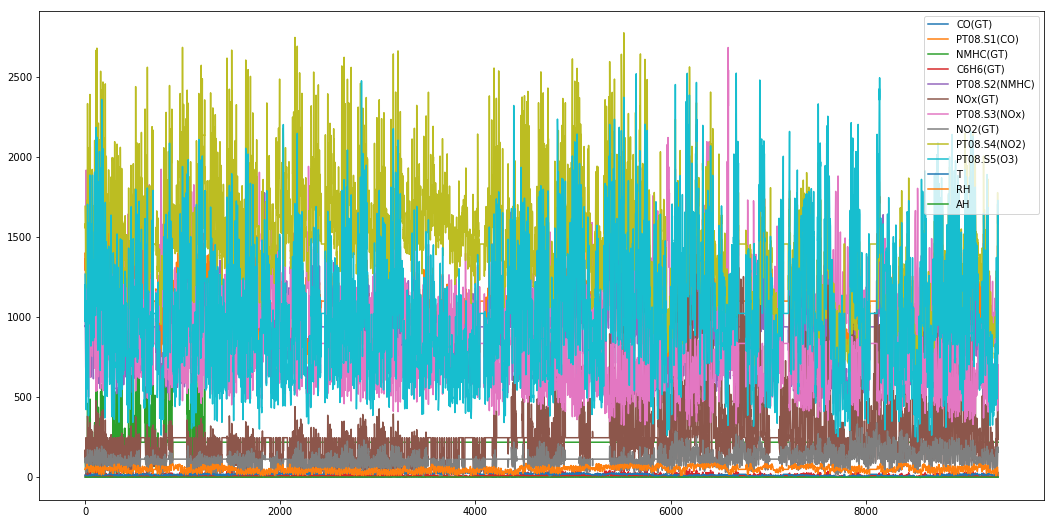

In [4]:
%matplotlib inline

df.plot(figsize=[18,9])

In [5]:
# df = df[(df['CO(GT)'] != -200) 
#         & (df['PT08.S1(CO)'] != -200) 
#         & (df['NMHC(GT)'] != -200) 
#         & (df['C6H6(GT)'] != -200) 
#         & (df['PT08.S2(NMHC)'] != -200) 
#         & (df['NOx(GT)'] != -200) 
#         & (df['PT08.S3(NOx)'] != -200) 
#         & (df['NO2(GT)'] != -200) 
#         & (df['PT08.S4(NO2)'] != -200) 
#         & (df['PT08.S5(O3)'] != -200) 
#         & (df['T'] != -200) 
#         & (df['RH'] != -200) 
#         & (df['AH'] != -200)]

# Split the data into three categories with random sampling
#train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])
#len(train.index), len(validate.index), len(test.index)

# Split the data into two continuous sets
train = df[0:round(0.60 * len(df.index))] 
test = df[round(0.60 * len(df.index)):]

len(train.index), len(test.index)

(5614, 3743)

In [6]:
train.sort_values(by=['Date','Time']).head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
510,01/04/2004,00.00.00,1.6,1143.0,106.0,6.3,825.0,96.000000,986.0,86.000000,1477.0,978.0,12.0,61.6,0.8593
511,01/04/2004,01.00.00,1.2,1044.0,100.0,5.1,770.0,85.000000,1031.0,70.000000,1425.0,944.0,11.5,63.9,0.8652
512,01/04/2004,02.00.00,1.1,1034.0,71.0,4.1,716.0,50.000000,1085.0,55.000000,1405.0,891.0,10.7,67.2,0.8630
513,01/04/2004,03.00.00,0.9,956.0,72.0,4.0,713.0,246.896735,1099.0,113.091251,1422.0,849.0,9.0,73.1,0.8394
514,01/04/2004,04.00.00,0.7,909.0,44.0,2.4,615.0,57.000000,1237.0,49.000000,1322.0,790.0,10.2,66.6,0.8299


In [7]:
test.sort_values(by=['Date','Time']).head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
7110,01/01/2005,00.00.00,2.15275,1046.0,218.811816,4.2,724.0,246.896735,848.0,113.091251,898.0,1201.0,8.2,40.1,0.4375
7111,01/01/2005,01.00.00,1.60000,1275.0,218.811816,8.8,930.0,215.000000,649.0,106.000000,1024.0,1617.0,5.3,50.7,0.4564
7112,01/01/2005,02.00.00,2.50000,1173.0,218.811816,7.5,878.0,300.000000,738.0,129.000000,1002.0,1355.0,5.9,50.0,0.4689
7113,01/01/2005,03.00.00,2.70000,1163.0,218.811816,7.6,881.0,246.896735,748.0,113.091251,1001.0,1296.0,4.9,53.9,0.4693
7114,01/01/2005,04.00.00,1.90000,1054.0,218.811816,5.6,791.0,253.000000,830.0,126.000000,967.0,1131.0,4.3,55.3,0.4650


In [8]:

df.Timestamp = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H.%M.%S')
df.index = df.Timestamp
df = df.resample(RESAMPLE_INTERVAL).mean()

df = df.dropna(axis=0,how='any')
pd.isnull(df).sum() > 0

len(df.index)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


391

In [9]:
train.Timestamp = pd.to_datetime(train['Date'] + ' ' + train['Time'], format='%d/%m/%Y %H.%M.%S')
train.index = train.Timestamp 
train = train.resample(RESAMPLE_INTERVAL).mean()

train = train.dropna(axis=0,how='any')
pd.isnull(train).sum() > 0

len(train.index) 

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


235

In [10]:
test.Timestamp = pd.to_datetime(test['Date'] + ' ' + test['Time'], format='%d/%m/%Y %H.%M.%S')
test.index = test.Timestamp 
test = test.resample(RESAMPLE_INTERVAL).mean()

test = test.dropna(axis=0,how='any')
pd.isnull(test).sum() > 0

len(test.index)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


157

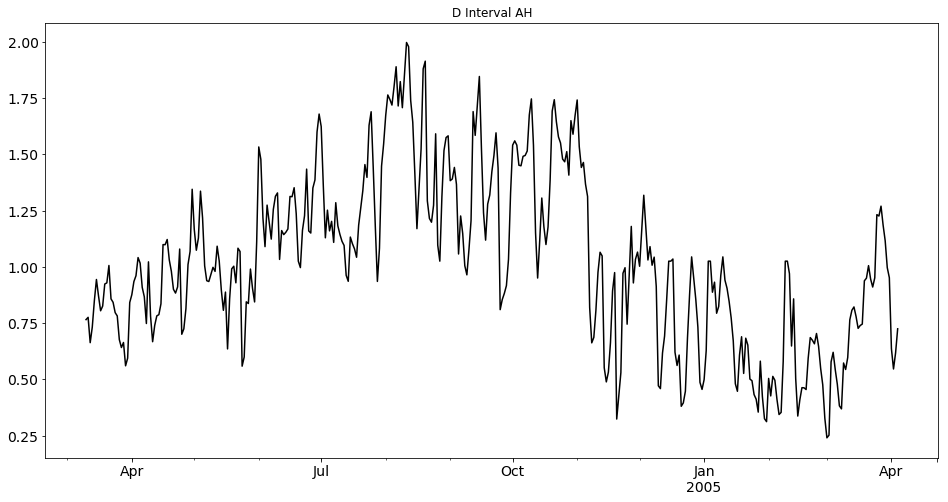

In [11]:
# Plotting data
#train[CONTEXT_COLUMN].plot(figsize=(16,8), fontsize=14, label='Train')
#test[CONTEXT_COLUMN].plot(figsize=(16,8), fontsize=14, label='Test')
df[CONTEXT_COLUMN].plot(figsize=(16,8), fontsize=14, title= RESAMPLE_INTERVAL + " Interval " + CONTEXT_COLUMN, color="black")
plt.show()

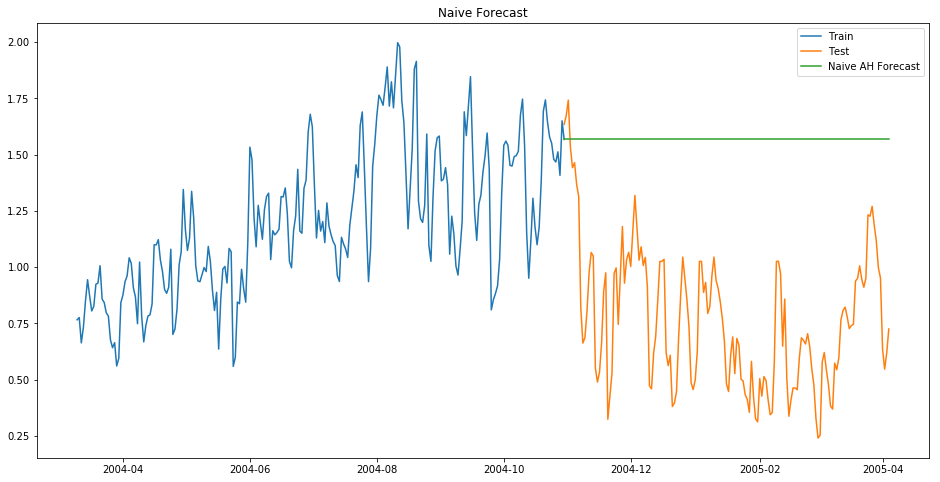

In [12]:
dd = np.asarray(train[CONTEXT_COLUMN])
y_hat = test.copy()
y_hat['naive'] = dd[len(dd)-1]

plt.figure(figsize=(16,8))
plt.plot(train.index, train[CONTEXT_COLUMN], label='Train')
plt.plot(test.index,test[CONTEXT_COLUMN], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive %s Forecast' %CONTEXT_COLUMN)
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.show()

In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
rms = sqrt(mean_squared_error(test[CONTEXT_COLUMN], y_hat.naive))
rms

0.859410643476003

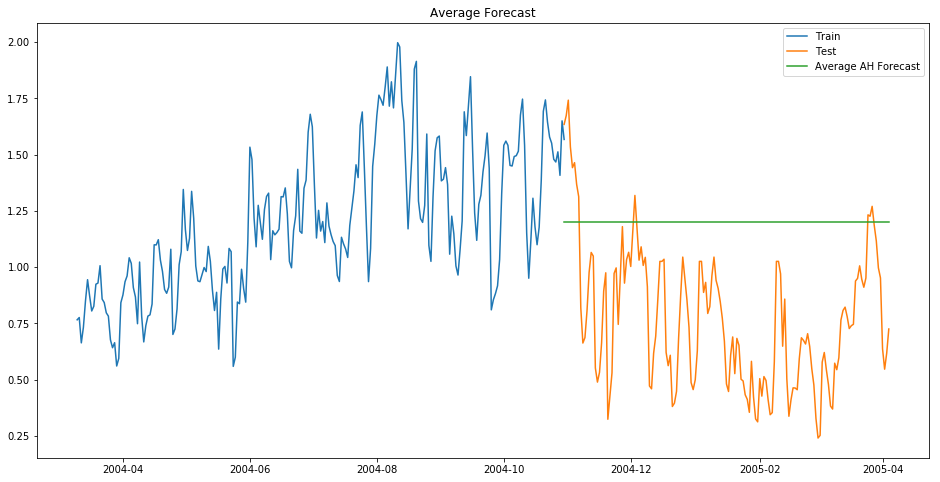

In [15]:
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train[CONTEXT_COLUMN].mean()

plt.figure(figsize=(16,8))
plt.plot(train[CONTEXT_COLUMN], label='Train')
plt.plot(test[CONTEXT_COLUMN], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average %s Forecast' %CONTEXT_COLUMN)
plt.legend(loc='best')
plt.title("Average Forecast")
plt.show()

In [16]:
rms = sqrt(mean_squared_error(test.RH, y_hat_avg.avg_forecast))
rms

54.897481262600266

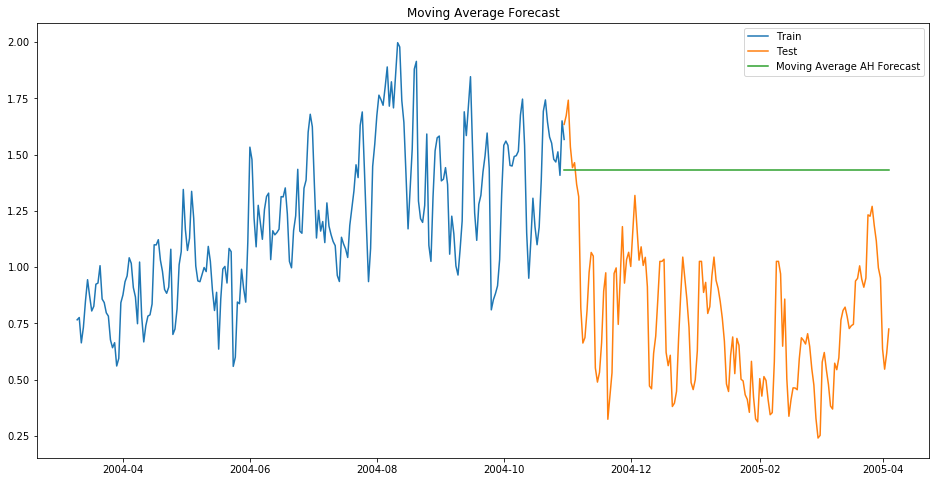

In [17]:
y_hat_avg = test.copy()
y_hat_avg['moving_avg_forecast'] = train[CONTEXT_COLUMN].rolling(100).mean().iloc[-1]

plt.figure(figsize=(16,8))
plt.plot(train[CONTEXT_COLUMN], label='Train')
plt.plot(test[CONTEXT_COLUMN], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average %s Forecast' %CONTEXT_COLUMN)
plt.legend(loc='best')
plt.title("Moving Average Forecast")
plt.show()

In [18]:
rms = sqrt(mean_squared_error(test[CONTEXT_COLUMN], y_hat_avg.moving_avg_forecast))
rms

0.7359763517193711

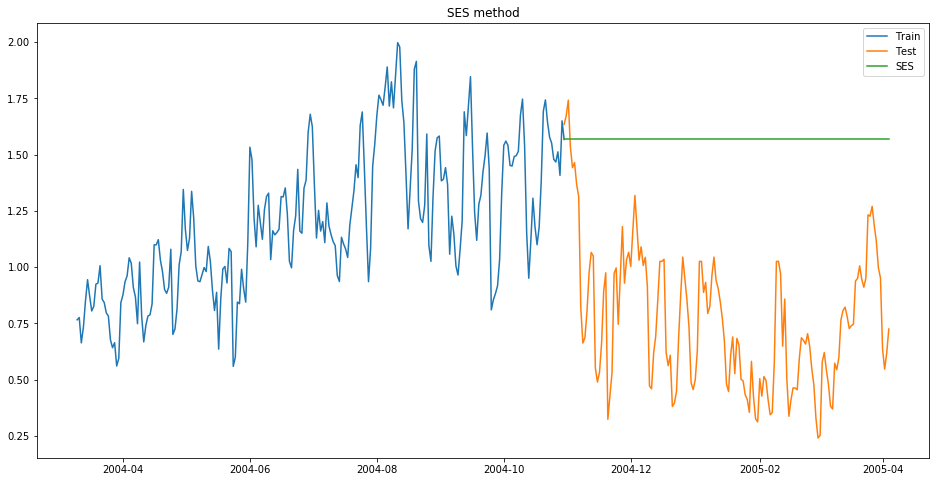

In [19]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

y_hat_avg = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train[CONTEXT_COLUMN])).fit(smoothing_level=0.6,optimized=False)
y_hat_avg['SES'] = fit2.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train[CONTEXT_COLUMN], label='Train')
plt.plot(test[CONTEXT_COLUMN], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')
plt.title("SES method")
plt.show()

In [20]:
rms = sqrt(mean_squared_error(test[CONTEXT_COLUMN], y_hat_avg.SES))
rms

0.8597311911306543

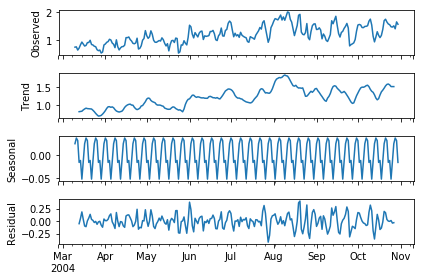

In [21]:
sm.tsa.seasonal_decompose(train[CONTEXT_COLUMN]).plot()
result = sm.tsa.stattools.adfuller(train[CONTEXT_COLUMN])

plt.show()

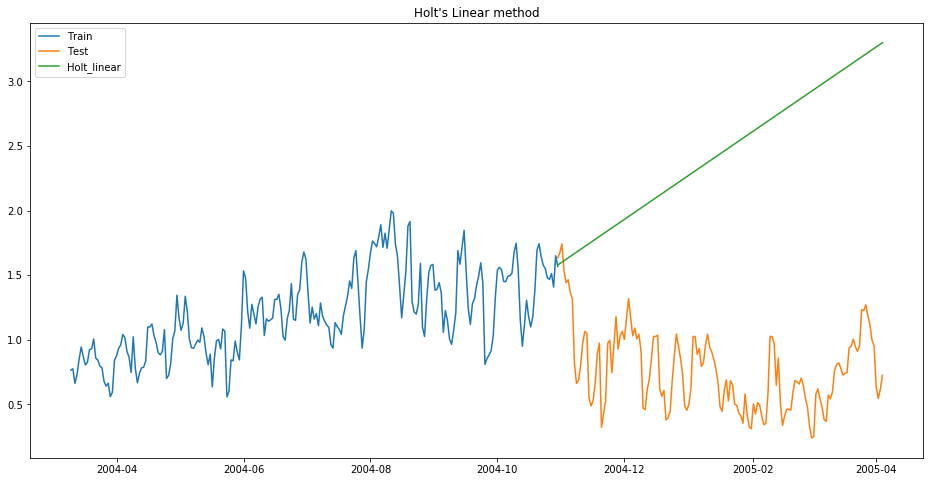

In [22]:
y_hat_avg = test.copy()

fit1 = Holt(np.asarray(train[CONTEXT_COLUMN])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot(train[CONTEXT_COLUMN], label='Train')
plt.plot(test[CONTEXT_COLUMN], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.title("Holt's Linear method")
plt.show()

In [23]:
rms = sqrt(mean_squared_error(test[CONTEXT_COLUMN], y_hat_avg.Holt_linear))
rms
#fit1.summary()

1.801964103269501

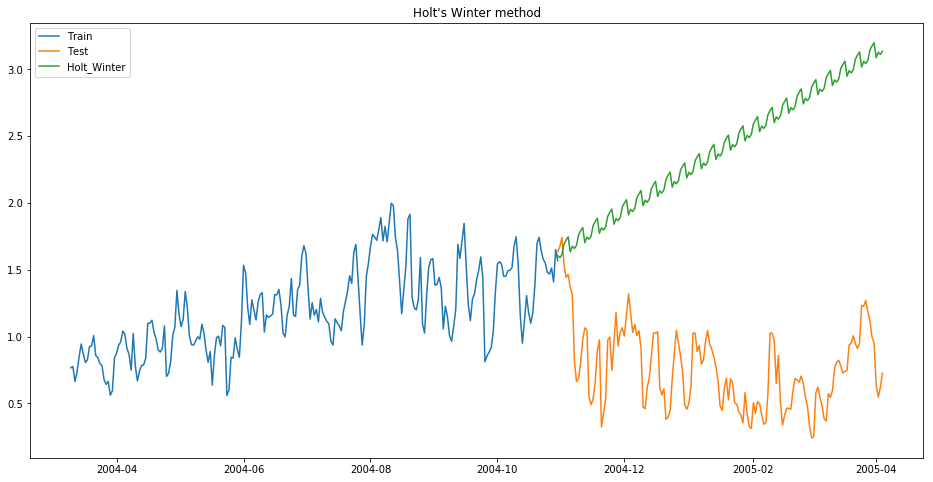

In [24]:
y_hat_avg = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train[CONTEXT_COLUMN]) ,seasonal_periods=7 ,trend='add', 
                            seasonal='add',).fit()
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

plt.figure(figsize=(16,8))
plt.plot( train[CONTEXT_COLUMN], label='Train')
plt.plot(test[CONTEXT_COLUMN], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')
plt.title("Holt's Winter method")
plt.show()

In [25]:
rms = sqrt(mean_squared_error(test[CONTEXT_COLUMN], y_hat_avg.Holt_Winter))
rms
#fit1.summary()

1.7477866131193946

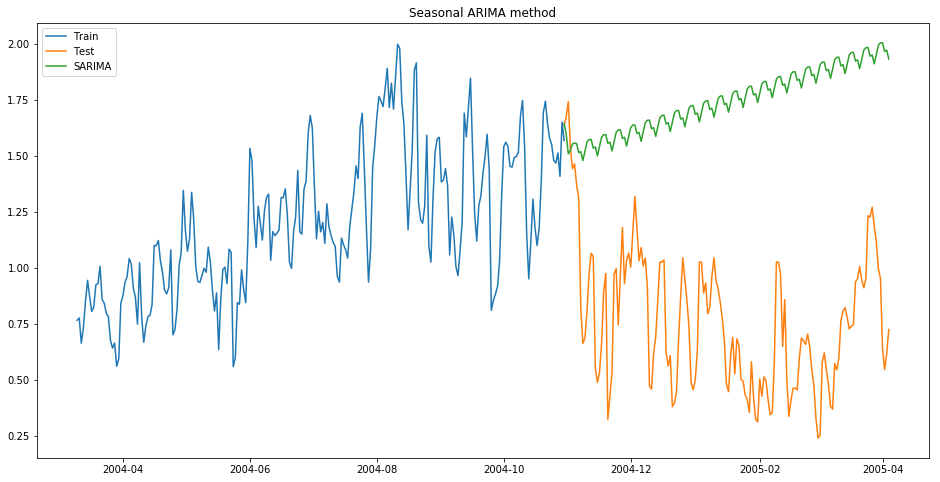

In [26]:
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train[CONTEXT_COLUMN], order=(1, 1, 4),seasonal_order=(0,1,1,7),
                                  enforce_invertibility=False).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=y_hat_avg.index[0].to_pydatetime(),
                                    end=y_hat_avg.index[-1].to_pydatetime(),
                                    dynamic=True)

plt.figure(figsize=(16,8))
plt.plot( train[CONTEXT_COLUMN], label='Train')
plt.plot(test[CONTEXT_COLUMN], label='Test')
plt.plot(y_hat_avg['SARIMA'], label='SARIMA')
plt.legend(loc='best')
plt.title("Seasonal ARIMA method")
plt.show()

In [27]:
rms = sqrt(mean_squared_error(test[CONTEXT_COLUMN], y_hat_avg.SARIMA))
rms
#fit1.summary()

1.0479106135450125